# Plotting negative values

## Import packages / modules

Import `dmslogo` along with the other Python packages used in
these examples:

In [1]:
import matplotlib.pyplot as plt

import numpy

import pandas as pd

import dmslogo
from dmslogo.colorschemes import CBPALETTE

Set options to display pandas DataFrames:

In [2]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 500)

## Simple logo plot with negative values

Recall that [dmslogo.logo.draw_logo](https://jbloomlab.github.io/dmslogo/dmslogo.logo.html#dmslogo.logo.draw_logo) takes as input a pandas DataFrame that has columns with:

 * site in sequential integer numbering

 * letter (i.e., amino acid or nucleotide)

 * height of letter (can be any positive number)

Here make a simple data frame that fits these specs, **including some negative values**:

In [3]:
data = pd.DataFrame.from_records(
        data=   [(    1,      'A',        1),
                 (    1,      'C',      0.1),
                 (    1,      'D',     -0.3),
                 (    2,      'C',     -0.1),
                 (    2,      'D',      1.2),
                 (    2,      'E',      0.0),
                 (    5,      'A',     -0.4),
                 (    5,      'K',      0.4)],
        columns=['site', 'letter', 'height'])

data

,site,letter,height
0,1,A,1.0
1,1,C,0.1
2,1,D,-0.3
3,2,C,-0.1
4,2,D,1.2
5,2,E,0.0
6,5,A,-0.4
7,5,K,0.4


Now use [dmslogo.logo.draw_logo](https://jbloomlab.github.io/dmslogo/dmslogo.logo.html#dmslogo.logo.draw_logo) to draw the logo plot with the `clip_negative_heights` flag set to `True`.
As you can see below, the result is a plot that **only** shows the positive values:

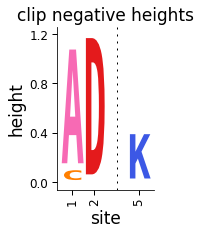

In [4]:
fig, ax = dmslogo.draw_logo(data=data,
                            x_col='site',
                            letter_col='letter',
                            letter_height_col='height',
                            clip_negative_heights=True,
                            title='clip negative heights')

Now let's draw the same plot but **not** clip the negative heights, see how the resulting plot shows the positive heights above and the negative heights below a black center line at zero:

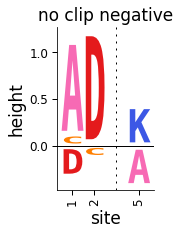

In [5]:
fig, ax = dmslogo.draw_logo(data=data,
                            x_col='site',
                            letter_col='letter',
                            letter_height_col='height',
                            title='no clip negative')

If you do not want to include the center line, set `draw_line_at_zero` to `'never'`:

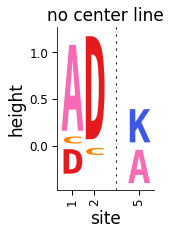

In [6]:
fig, ax = dmslogo.draw_logo(data=data,
                            x_col='site',
                            letter_col='letter',
                            letter_height_col='height',
                            title='no center line',
                            draw_line_at_zero='never')

We can also make a plot where we color the letters above and below the line different colors:

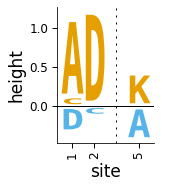

In [7]:
fig, ax = dmslogo.draw_logo(
        data=data
             .assign(color=lambda x: numpy.where(x['height'] > 0,
                                                 CBPALETTE[1],
                                                 CBPALETTE[2])),
        x_col='site',
        letter_col='letter',
        letter_height_col='height',
        color_col='color')